# Decision Tree Assignment

Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set   from   Kaggle.   This   data   set   provides  information   on   the   Titanic passengers  and  can  be  used  to  predict  whether  a  passenger  survived  or not.
Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn 
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
Url=https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv
titanic = pd.read_csv(url)
titanic.columns= ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
You  use  only  Pclass,  Sex,  Age,  SibSp  (Siblings  aboard),  Parch (Parents/children  aboard),  and  Fare  to  predict  whether  a  passenger survived.

In [239]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report

In [196]:
# Loading the dataset
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [197]:
# Finding the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [198]:
# Finding the statistical informati=ion of the dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [199]:
# Finding the null values present in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [200]:
# We dont need cabin in the dataset
df.drop(columns='Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [201]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [202]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [203]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [204]:
# Age missing values
df[df['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [205]:
pd.DataFrame(df['Age'],df['Pclass']).head(25)

,Age
Pclass,
3,35.0
1,38.0
3,35.0
1,38.0
3,35.0
3,35.0
1,38.0
3,35.0
3,35.0


In [206]:
# Replacing the missing values in Age
df['Age'] = df['Age'].fillna(df['Age'].mode()[0])
df['Age'].isnull().sum()

0

In [207]:
# Checking for any NA values in the dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [208]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [209]:
# Replacing the NA values in the Embarked columm
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].isnull().sum()

0

In [210]:
# Checking for any NA values in the dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Now there is no null values present in the dataset

Percentage of Male survived:  18.890814558058924
Percentage of Male survived:  74.20382165605095


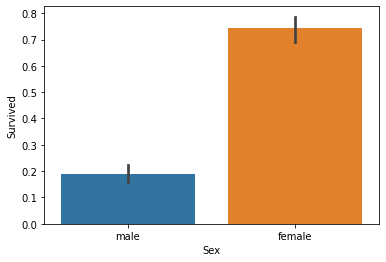

In [211]:
# How many peoples are survived withrespect to Sex
sns.barplot(x='Sex',y='Survived',data=df)
print("Percentage of Male survived: ", df['Survived'][df['Sex'] == 'male'].value_counts(normalize=True)[1]*100)
print("Percentage of Male survived: ", df['Survived'][df['Sex'] == 'female'].value_counts(normalize=True)[1]*100)

Percentage of peoples survived in Pclass 1:  62.96296296296296
Percentage of peoples survived in Pclass 2:  47.28260869565217
Percentage of peoples survived in Pclass 3:  24.236252545824847


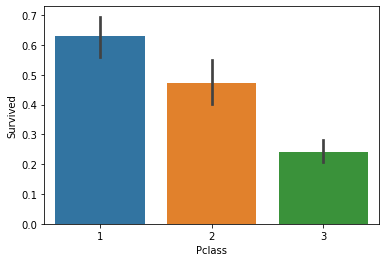

In [212]:
# Wrt to Pclass how many peoples are survived
sns.barplot(x='Pclass',y='Survived', data=df)
print("Percentage of peoples survived in Pclass 1: ", df['Survived'][df['Pclass'] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of peoples survived in Pclass 2: ", df['Survived'][df['Pclass'] == 2].value_counts(normalize=True)[1]*100)
print("Percentage of peoples survived in Pclass 3: ", df['Survived'][df['Pclass'] == 3].value_counts(normalize=True)[1]*100)

In [213]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Percentage of peoples survived in Pclass 0:  34.53947368421053
Percentage of peoples survived in Pclass 1:  53.588516746411486
Percentage of peoples survived in Pclass 2:  46.42857142857143


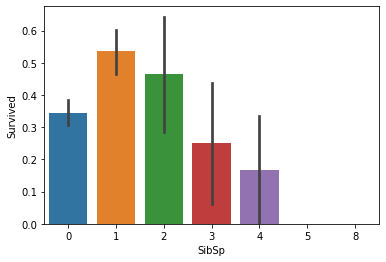

In [214]:
# Wrt to SibSp how many peoples are survived
sns.barplot(x='SibSp',y='Survived', data=df)
print("Percentage of peoples survived in Pclass 0: ", df['Survived'][df['SibSp'] == 0].value_counts(normalize=True)[1]*100)
print("Percentage of peoples survived in Pclass 1: ", df['Survived'][df['SibSp'] == 1].value_counts(normalize=True)[1]*100)
print("Percentage of peoples survived in Pclass 2: ", df['Survived'][df['SibSp'] == 2].value_counts(normalize=True)[1]*100)

In [215]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

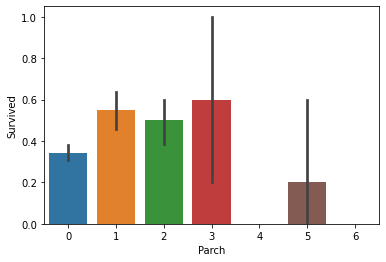

In [216]:
# Wrt to Parch how many peoples are survived
sns.barplot(x='Parch',y='Survived', data=df)
plt.show()

# Now we can select X and Y values for Training and Testing

In [217]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [218]:
X = df.drop(['PassengerId', 'Survived','Name', 'Ticket','Embarked'],axis=1)
Y = df['Survived']

In [219]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    object 
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [220]:
X['Sex'] = pd.get_dummies(X['Sex']).values

In [221]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    uint8  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 35.8 KB


In [222]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,24.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


# Now we can split the X and Y for Training and Testing

In [224]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=101, test_size=0.3)
print("The X_train values are: ", X_train.shape)
print("The X_test values are: ", X_test.shape)
print("The Y_train values are: ", Y_train.shape)
print("The Y_test values are: ", Y_test.shape)

The X_train values are:  (623, 6)
The X_test values are:  (268, 6)
The Y_train values are:  (623,)
The Y_test values are:  (268,)


# Decision Tree Algorithm

In [227]:
from sklearn.tree import DecisionTreeClassifier
decision_Tree = DecisionTreeClassifier()
decision_Tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [229]:
Y_prediction = decision_Tree.predict(X_test)
Y_prediction

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [232]:
print("The Train score is: ", decision_Tree.score(X_train,Y_train))
print("The Test score is: ", decision_Tree.score(X_test,Y_test))

The Train score is:  0.9839486356340289
The Test score is:  0.8022388059701493


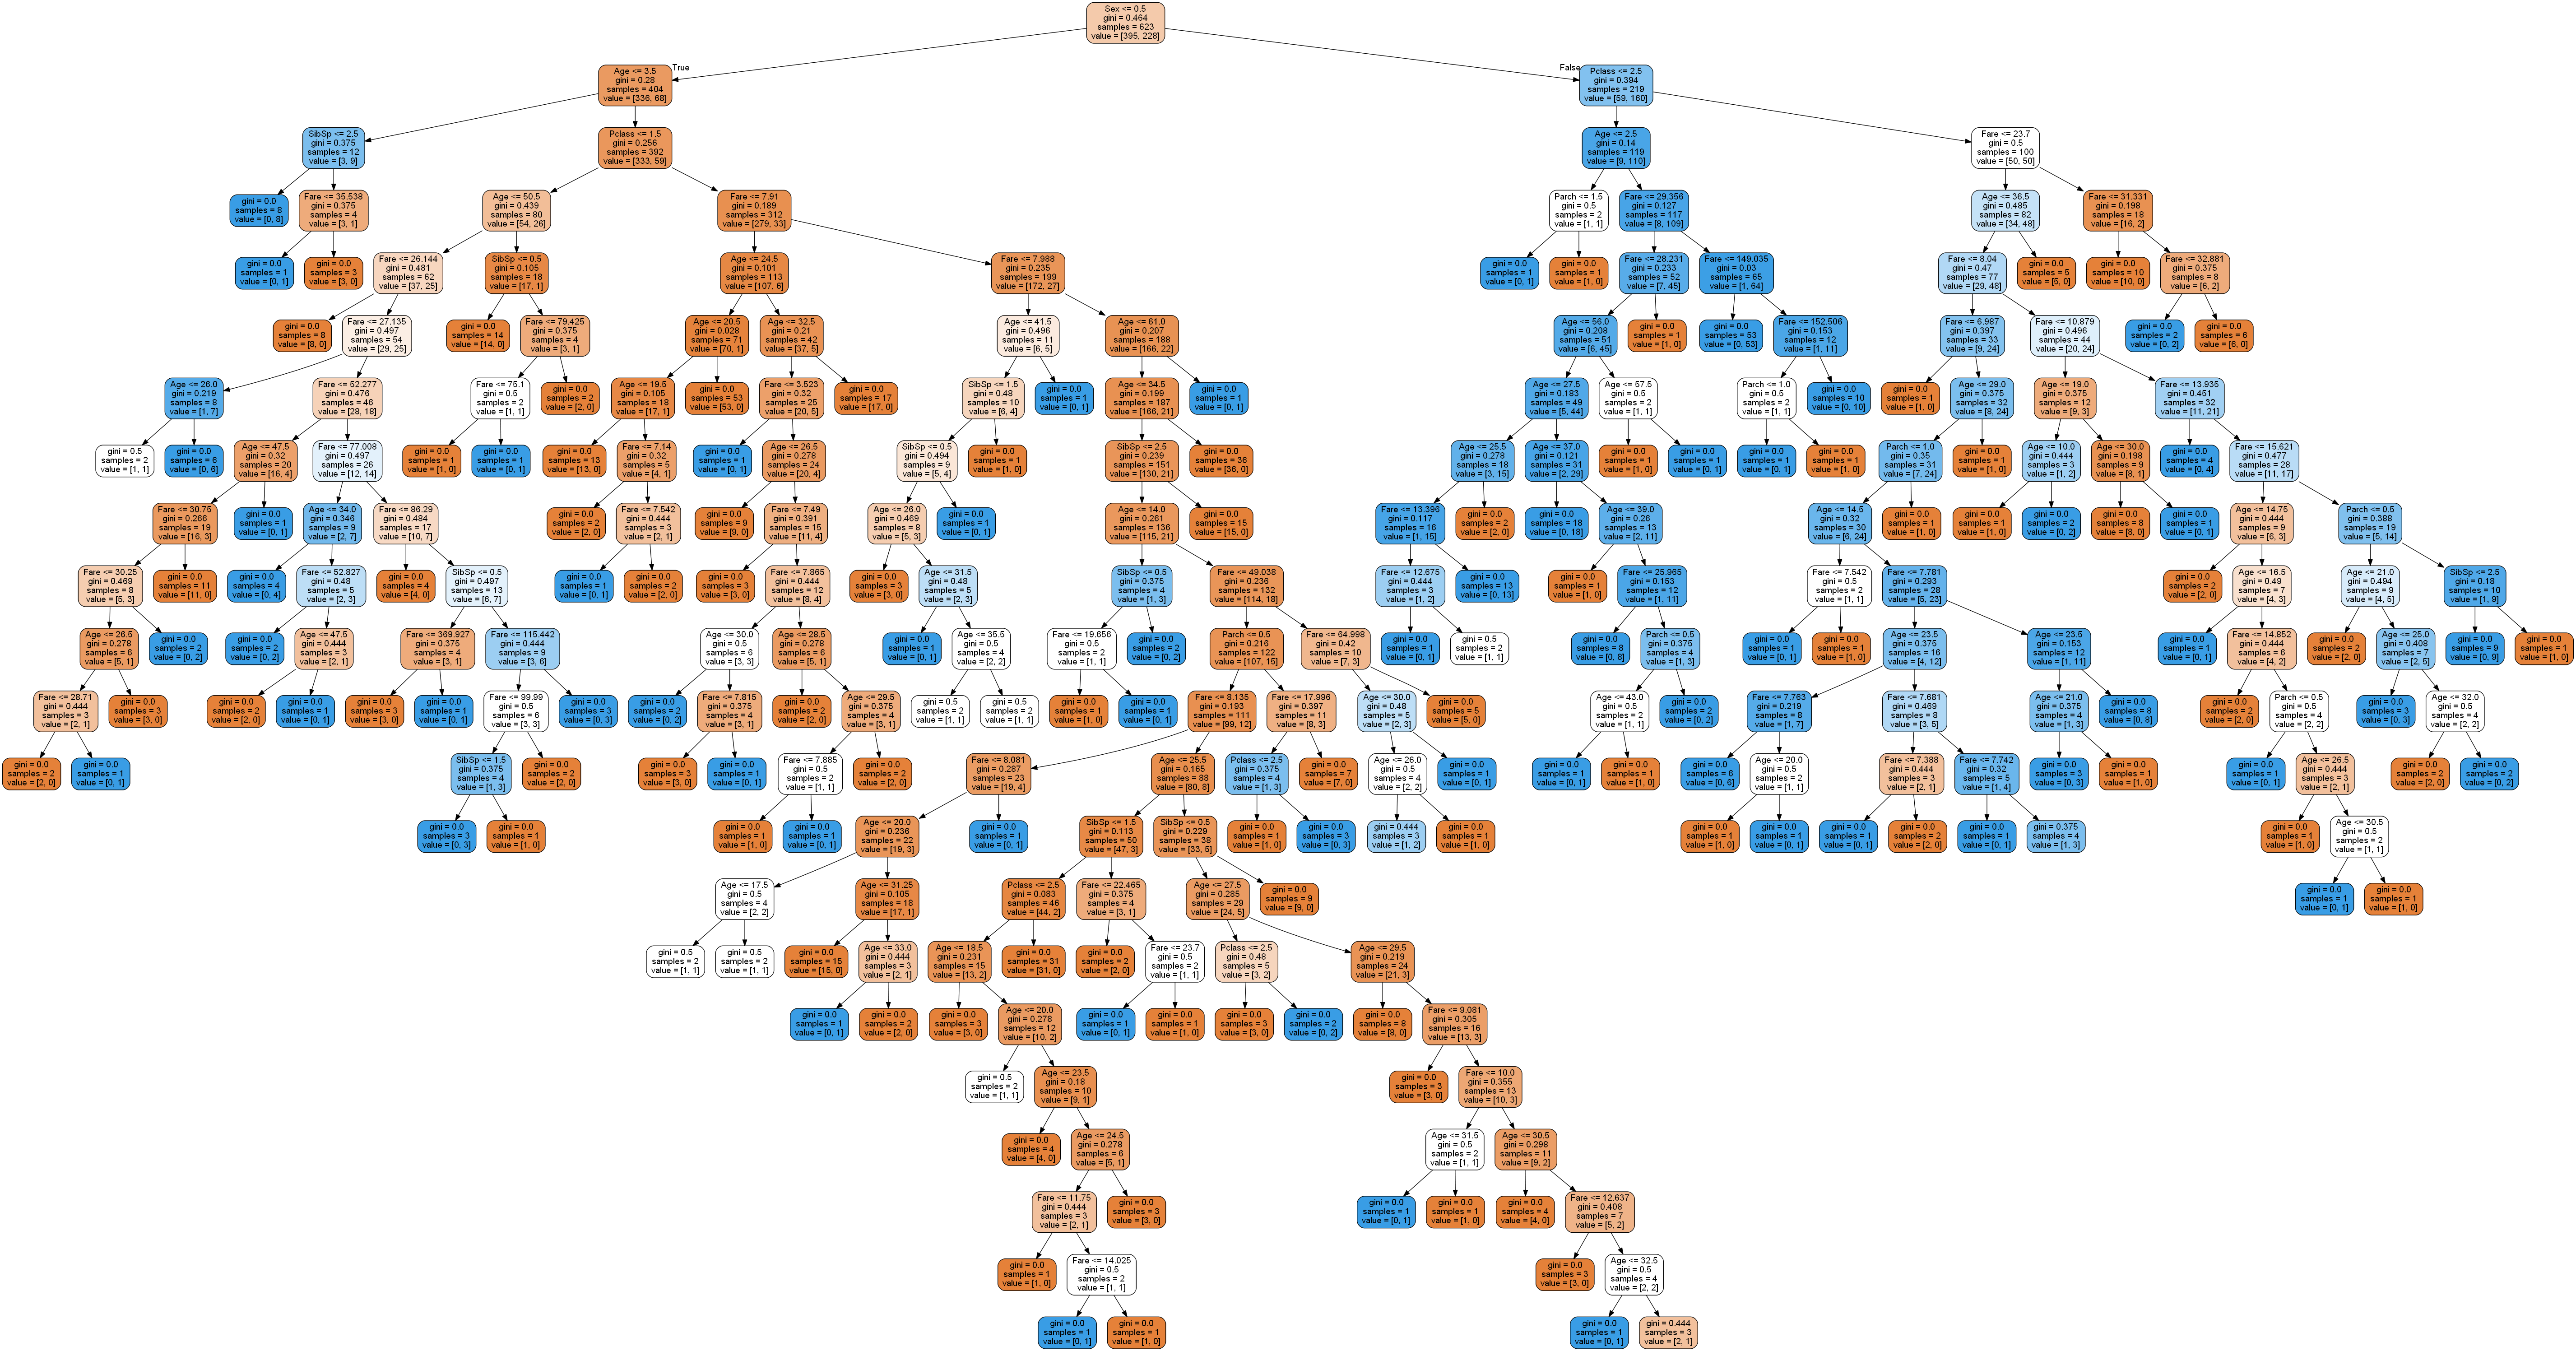

In [236]:
# We ploting a tree structure using dot plot
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus

feature_name=list(X.columns)

dot_data = export_graphviz(decision_Tree,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

# Lets do the "Hyper Paramter" in our dataset. We are Tuning our dataset to find the best possible parameters and use it in our model to get the best accuracy

In [237]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [241]:
grid_search = GridSearchCV(estimator=decision_Tree,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs =-1)

In [242]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [244]:
best_paramters = grid_search.best_params_
print(best_paramters)

{'criterion': 'entropy', 'max_depth': 31, 'min_samples_leaf': 5, 'min_samples_split': 4, 'splitter': 'random'}


In [245]:
decision_Tree_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 31, min_samples_leaf = 5, min_samples_split = 4, splitter = 'random')

In [246]:
decision_Tree_1.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=31, min_samples_leaf=5,
                       min_samples_split=4, splitter='random')

In [247]:
Y_prediction_1 = decision_Tree_1.predict(X_test)
Y_prediction_1

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1], dtype=int64)

In [249]:
print("The Train score is :", decision_Tree_1.score(X_train,Y_train))
print("The Test score is :",decision_Tree_1.score(X_test,Y_test))

The Train score is : 0.8426966292134831
The Test score is : 0.8097014925373134


In [250]:
# Saving the file
import pickle

with open('DTCmodelForprediction.sav','wb') as f:
    pickle.dump(decision_Tree_1,f)

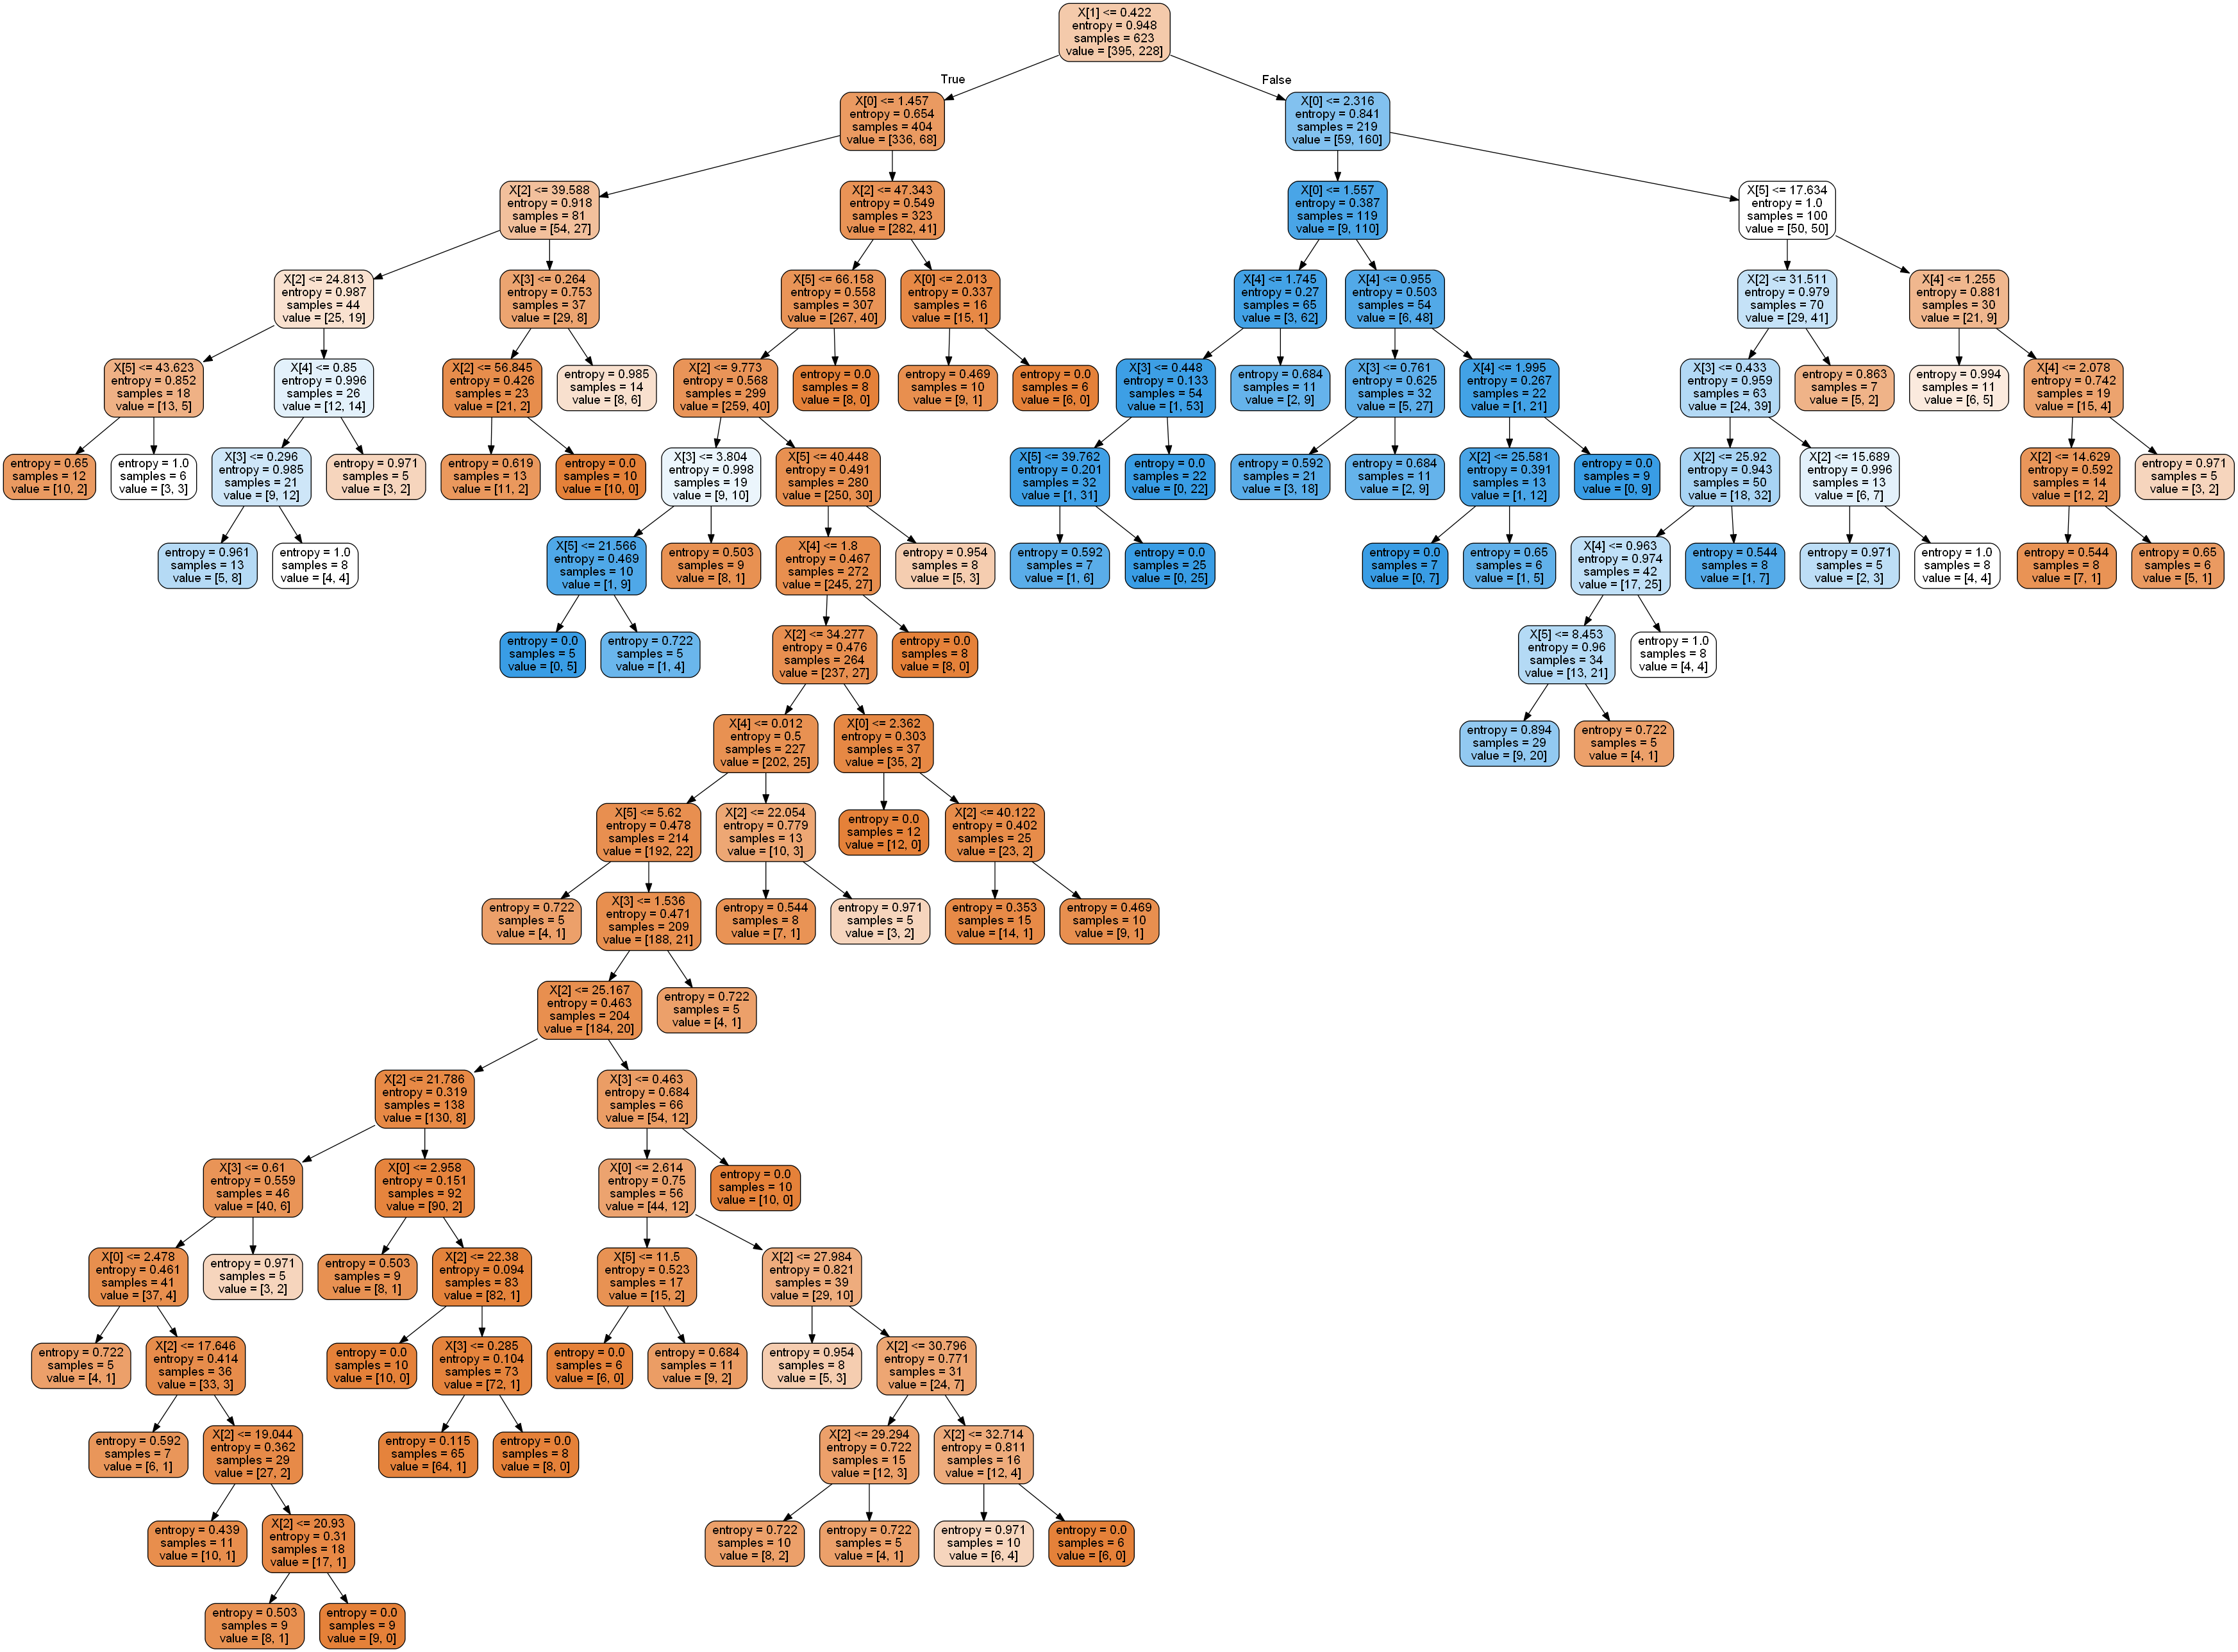

In [254]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(decision_Tree_1,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree1.png")
# Show graph
Image(graph.create_png())